In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

In [7]:
# You can import custom data
# cs_df = pd.read_csv('data_fold/ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [33]:
crash_df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Histogram Plot

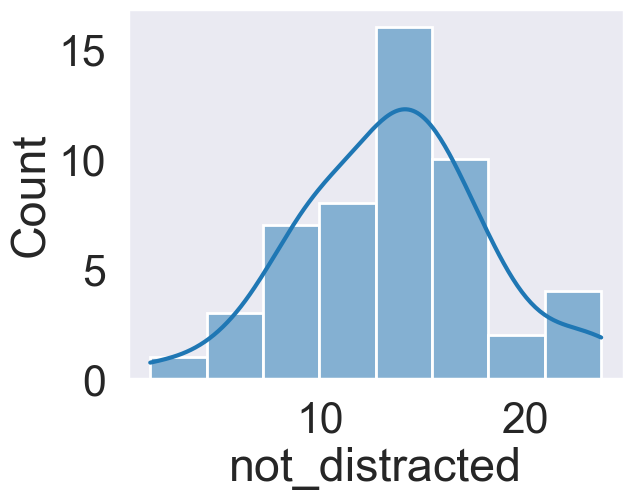

In [35]:
sns.histplot(crash_df['not_distracted'],kde=True)

plt.show()

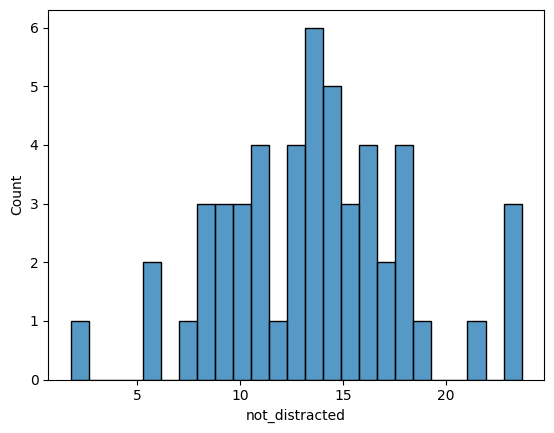

In [10]:
sns.histplot(crash_df['not_distracted'], bins=25, kde=False)

plt.show()

# Joint Plot

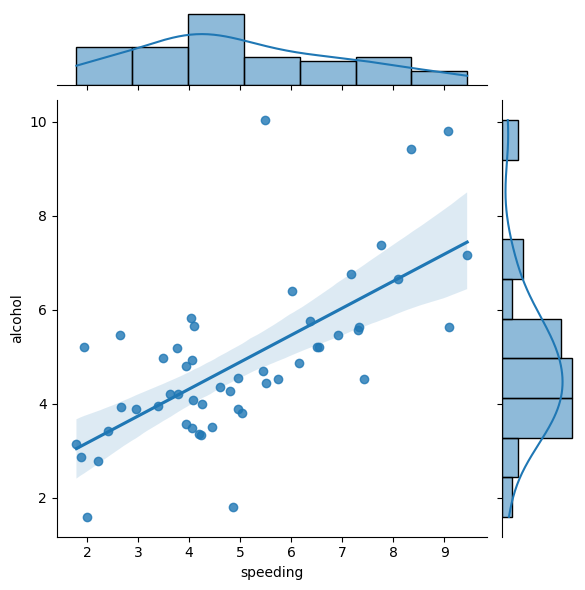

In [13]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
plt.show()

d:\Python\py-labs\.venv\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


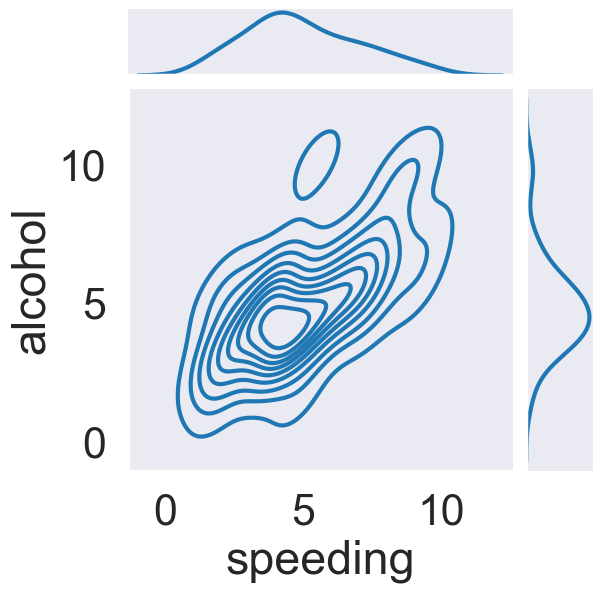

In [36]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')
plt.show()

d:\Python\py-labs\.venv\lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


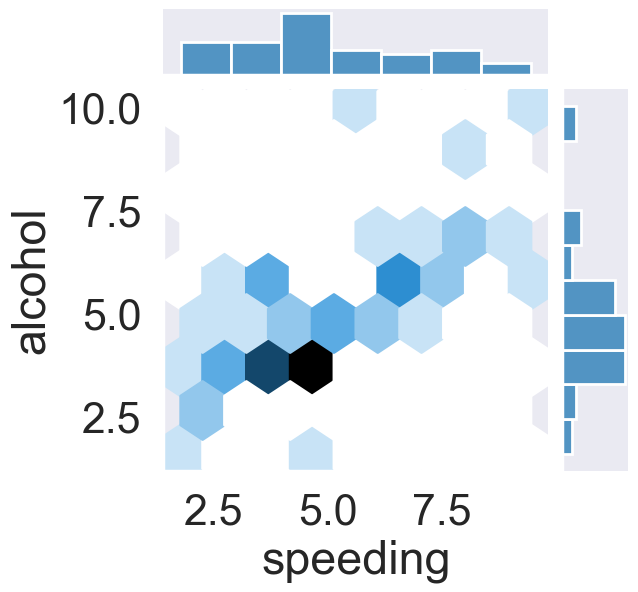

In [37]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')
plt.show()

# Kde Plot

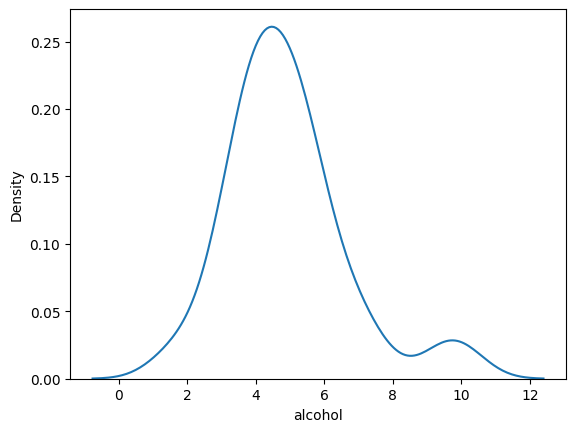

In [14]:
sns.kdeplot(crash_df['alcohol'])
plt.show()

# Pair Plot

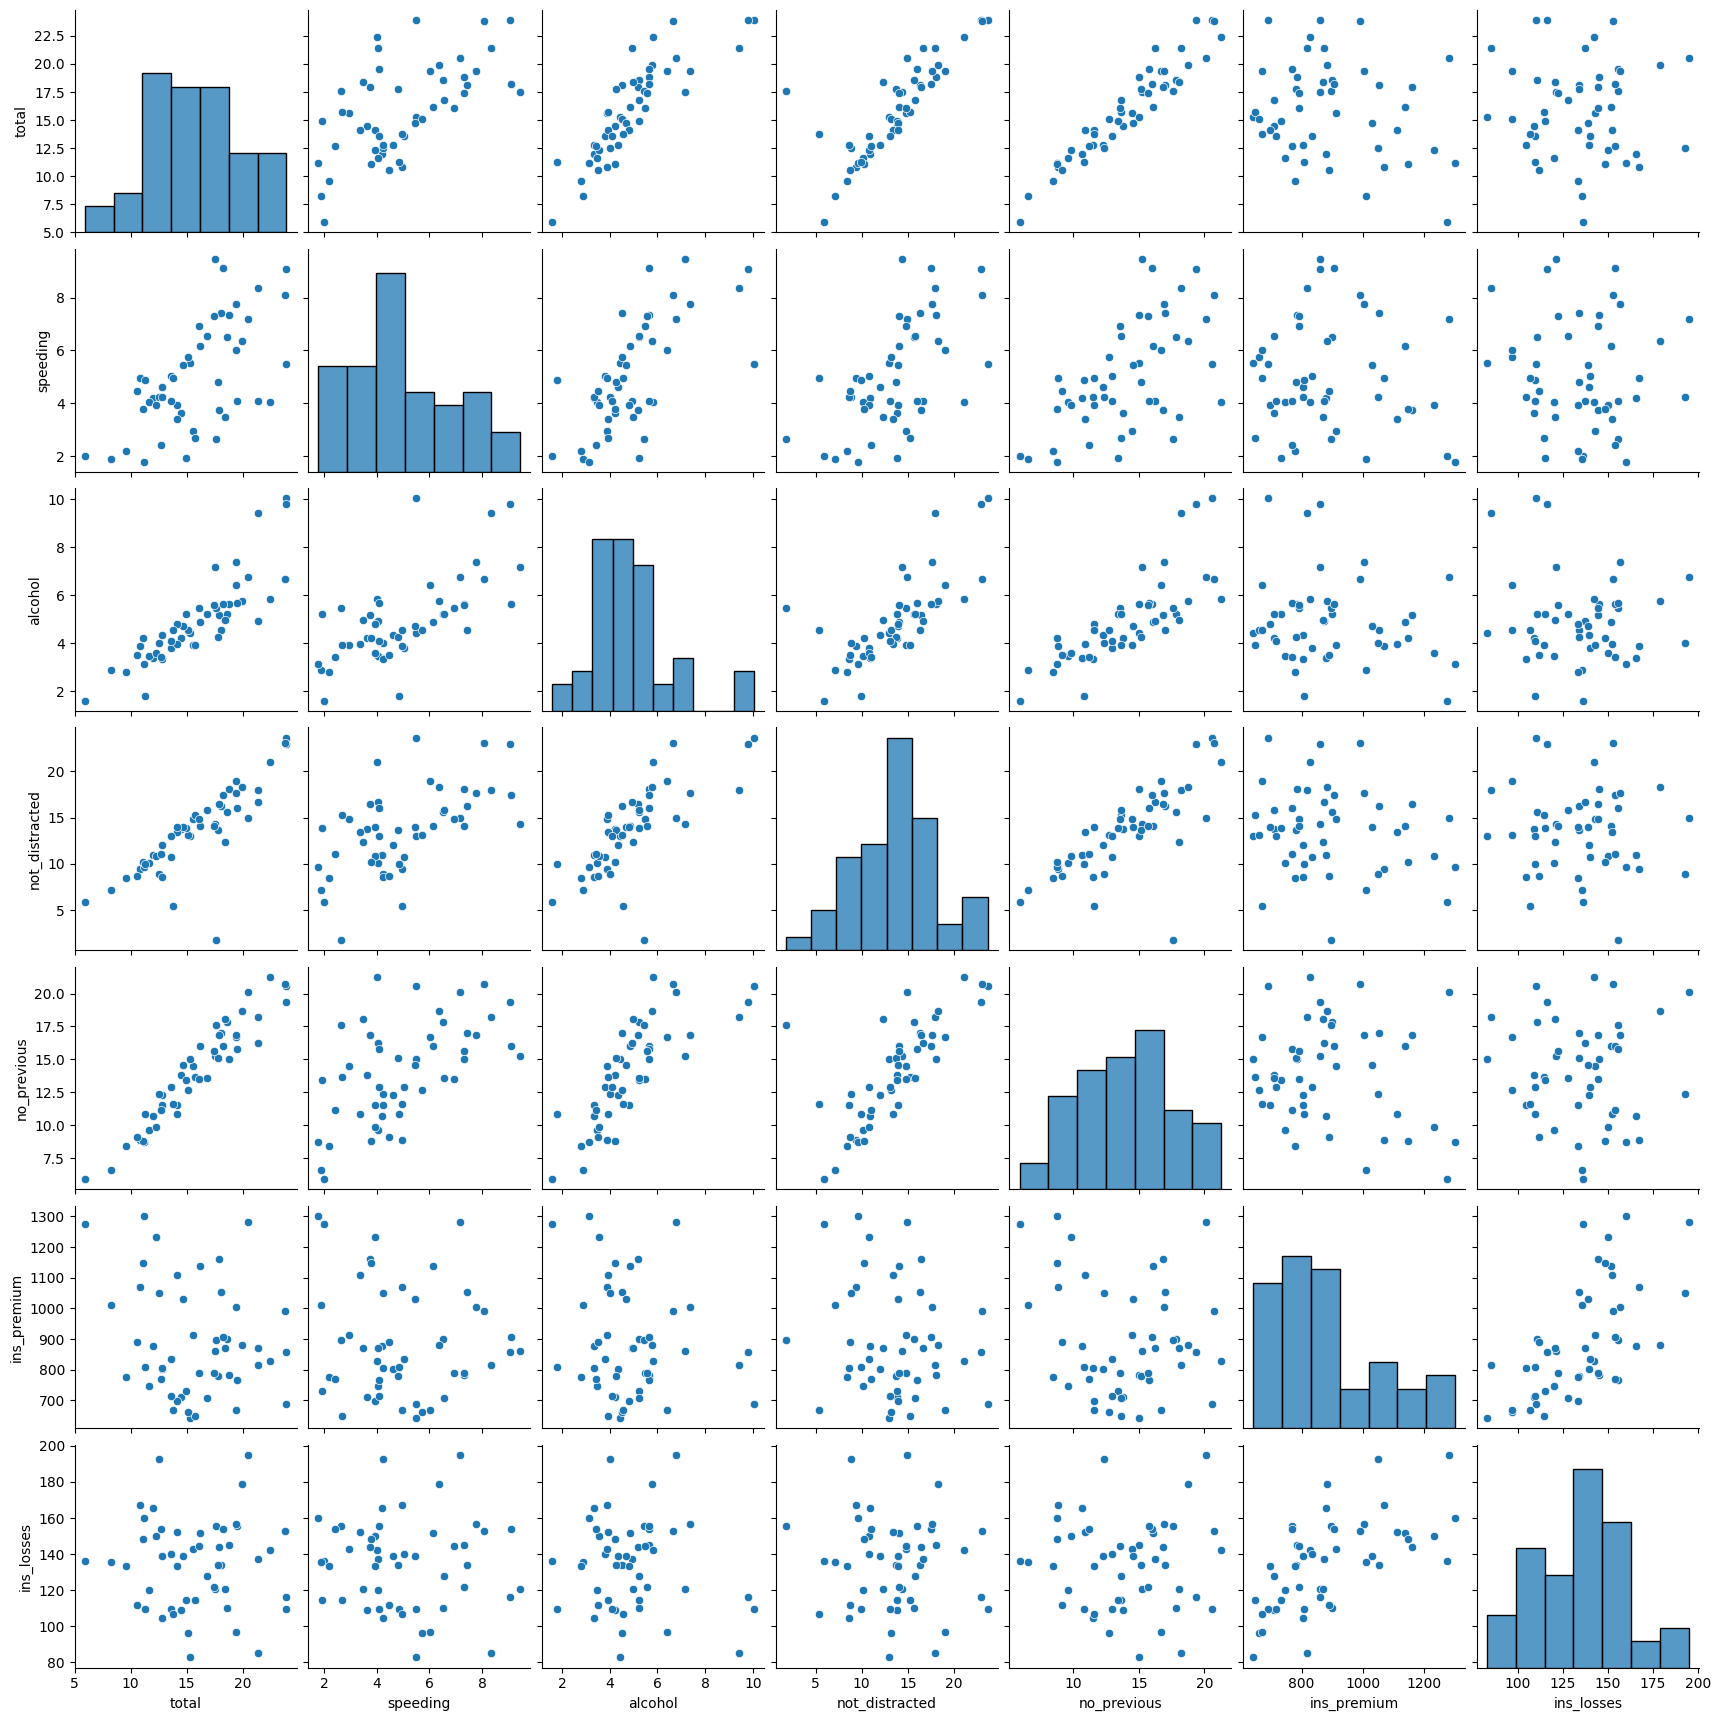

In [ ]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)


# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

In [40]:
# Load data on tips
tips_df = sns.load_dataset('tips')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


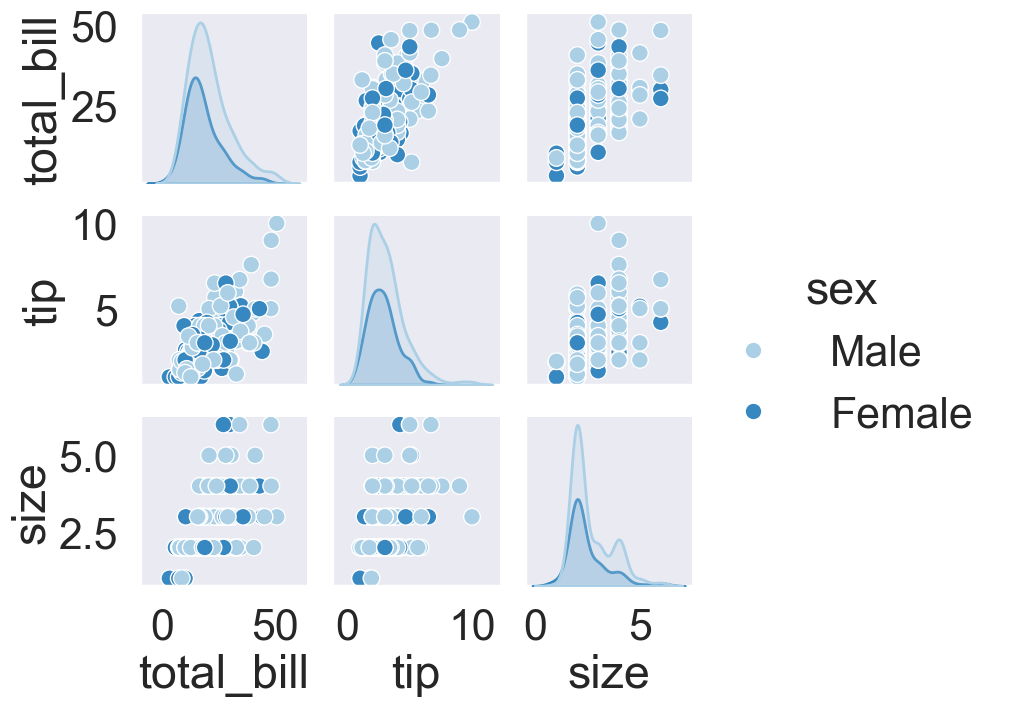

In [42]:
sns.pairplot(tips_df,hue='sex', palette="Blues")
plt.show()

# Rug Plot

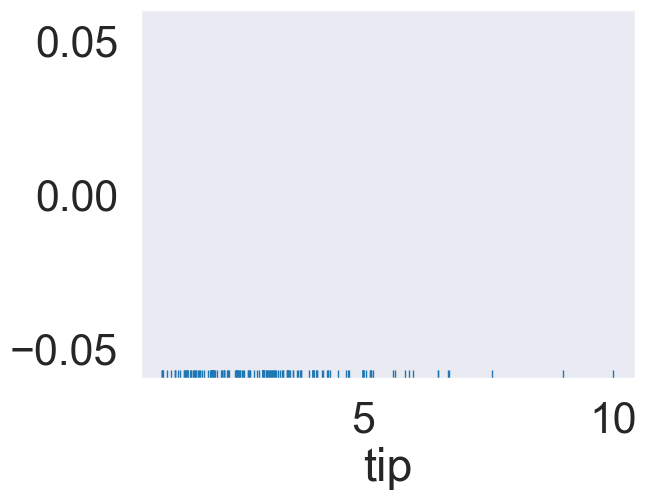

In [ ]:
sns.rugplot(tips_df['tip'])
plt.show()

# Styling

<Figure size 800x400 with 0 Axes>

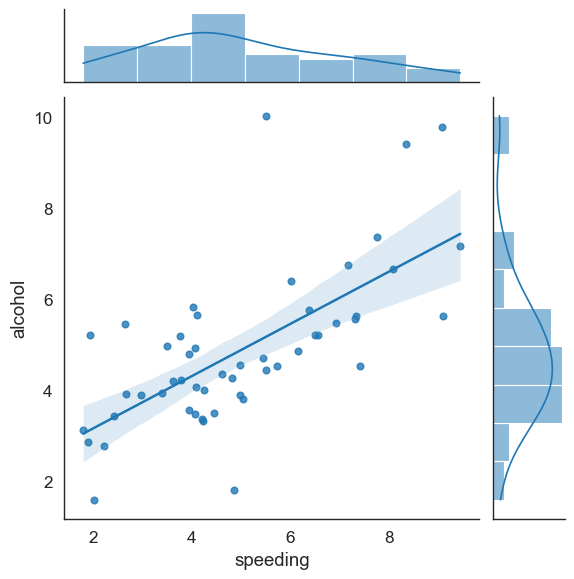

In [43]:

# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)
plt.show()

# Categorical Plot

## Bar Plot

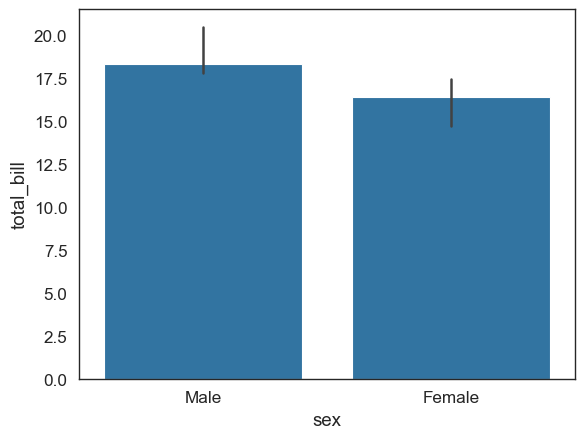

In [44]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex',y='total_bill',data=tips_df, estimator=np.median)
plt.show()

# Count Plot

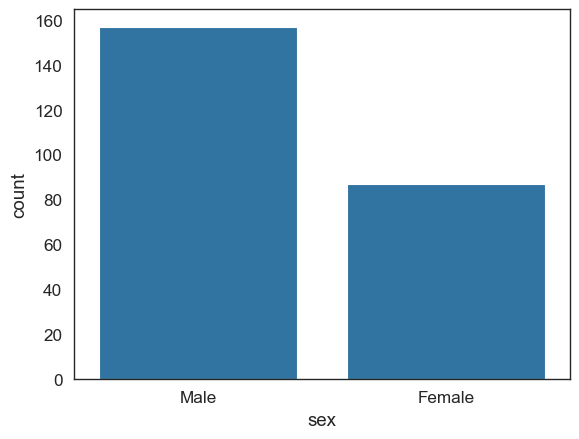

In [45]:

# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex',data=tips_df)
plt.show()

# Box Plot

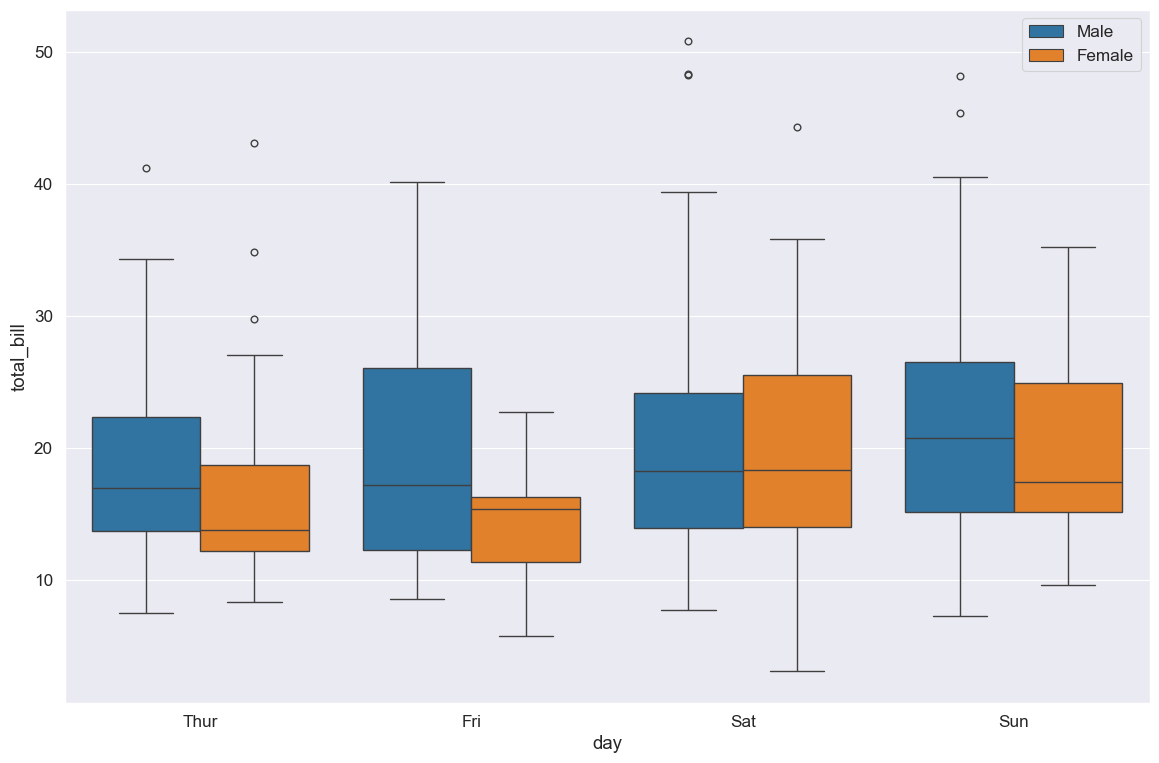

In [46]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

plt.show()

# Violin Plot

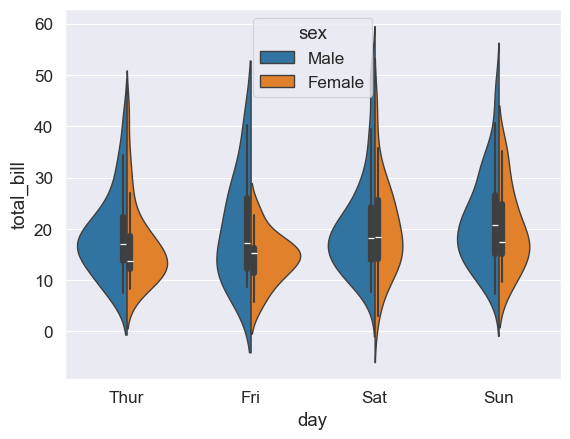

In [47]:

# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)
plt.show()

# Strip Plot

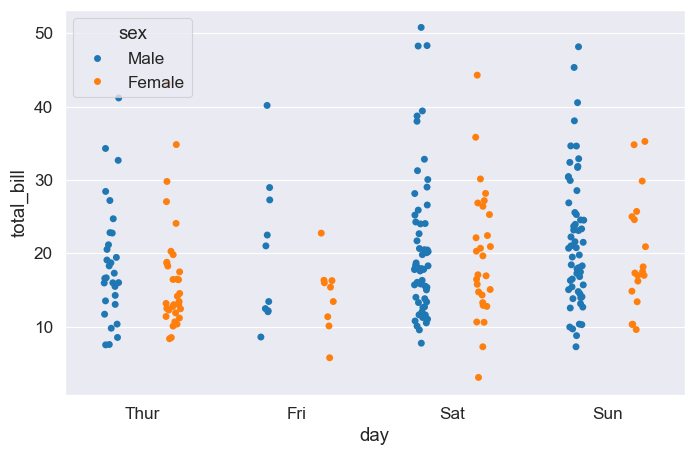

In [48]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)
plt.show()

# Swarm Plot

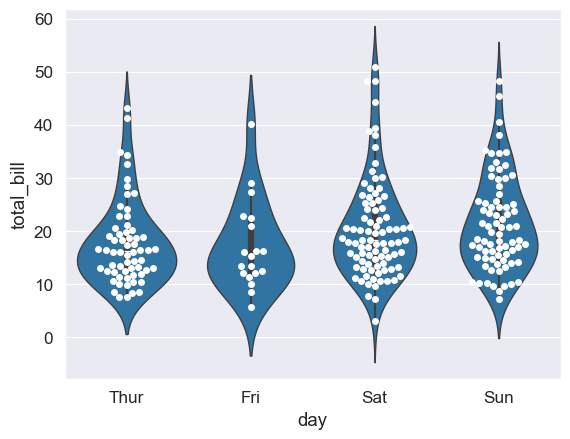

In [49]:

# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')

plt.show()

# Palettes

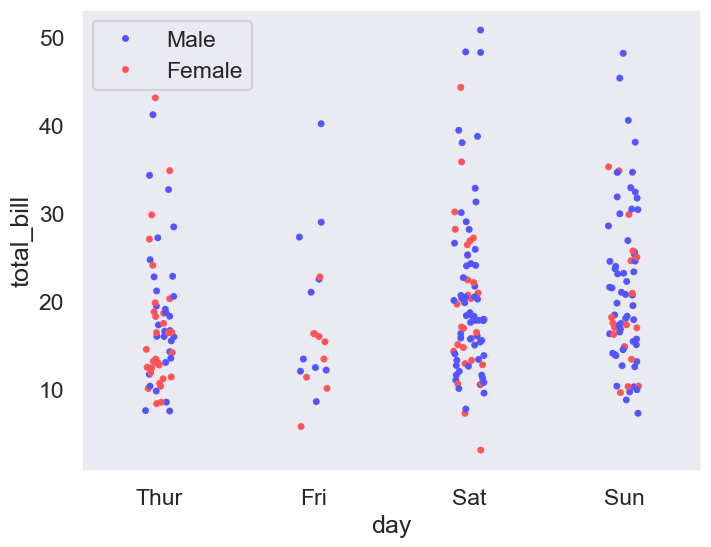

In [50]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)
plt.show()

# Matrix Plot

## Heatmap

In [56]:
crash_mx = crash_df.select_dtypes(include='number').corr()
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


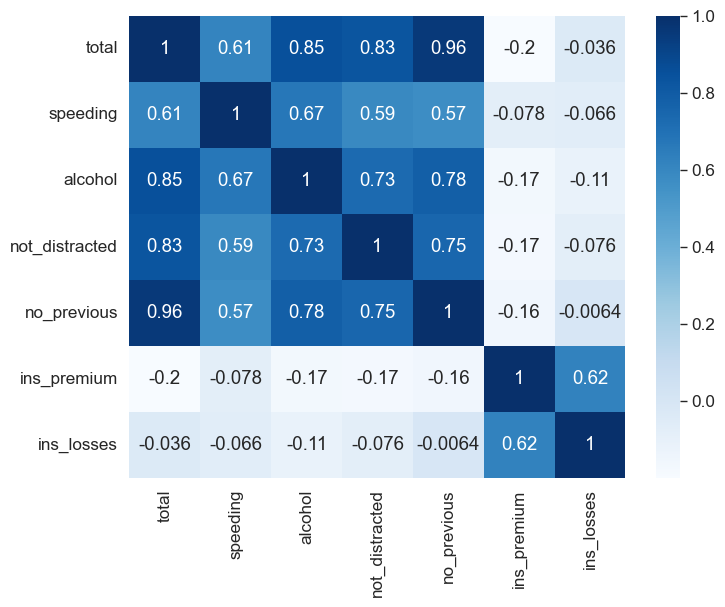

In [60]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.select_dtypes(include='number').corr()


# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')
plt.show()


In [58]:
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [59]:
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

C:\Users\prito\AppData\Local\Temp\ipykernel_11396\3596411606.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


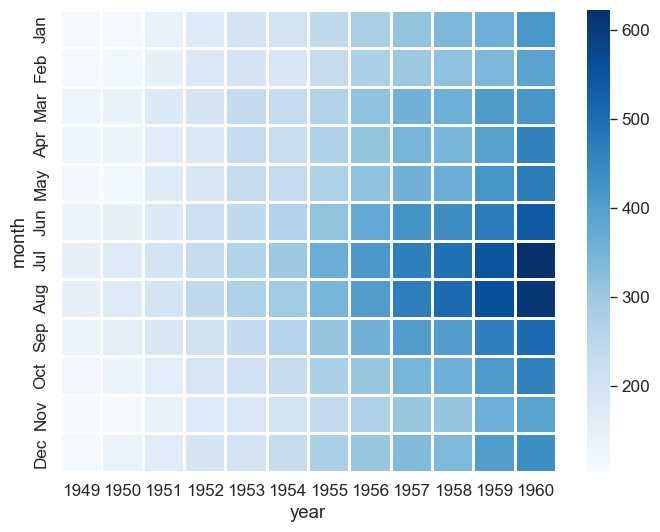

In [61]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
# flights = sns.load_dataset("flights")
# flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

plt.show()

# Cluster Map

In [63]:
# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
# Select only numeric columns
iris_numeric = iris.select_dtypes(include='number')
iris_numeric

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Return values for species
species = iris.pop("species")
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [73]:
import scipy

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)


# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
# Create clustermap
# Select only numeric columns
# Load iris dataset
# Example with iris dataset
# Load iris dataset
iris = sns.load_dataset('iris')

# Select numeric columns
iris_numeric = iris.select_dtypes(include='number')

# Create clustermap
sns.clustermap(iris_numeric, standard_scale=1, cmap='viridis')
plt.show()

<Figure size 800x600 with 0 Axes>

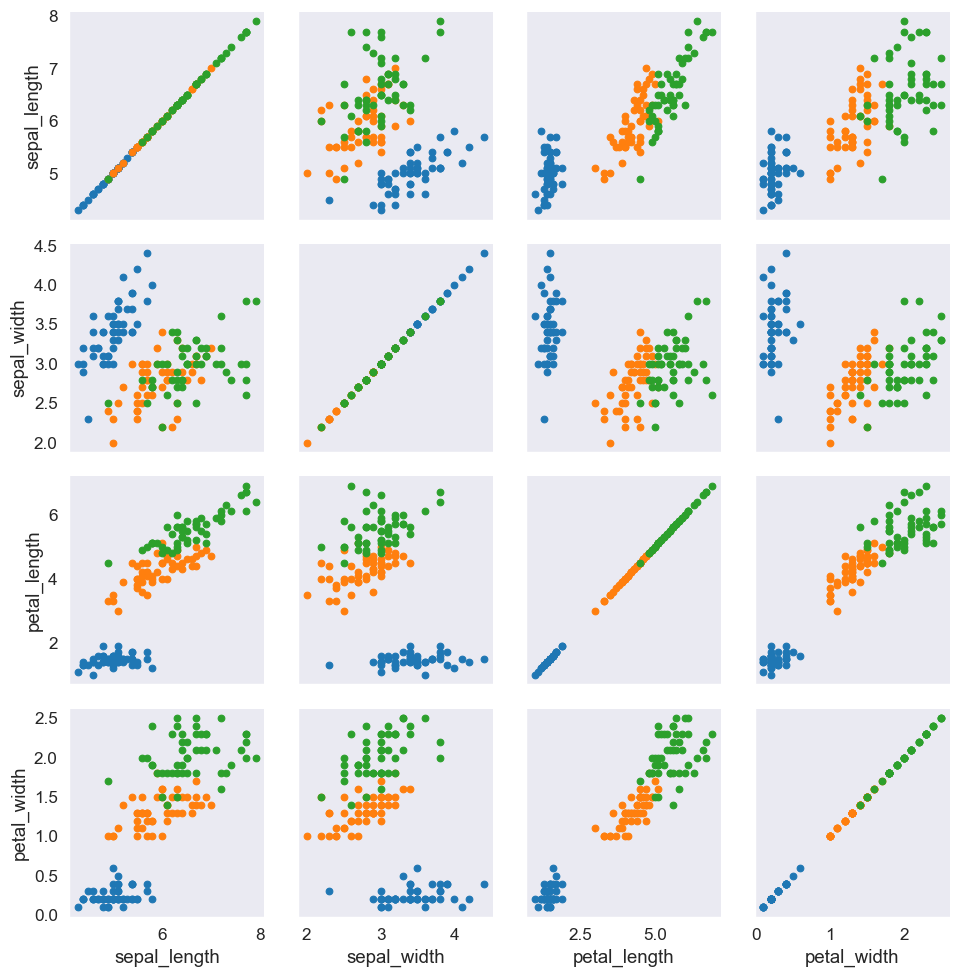

In [80]:
iris = sns.load_dataset('iris')

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
iris_g.map(plt.scatter)

plt.show()

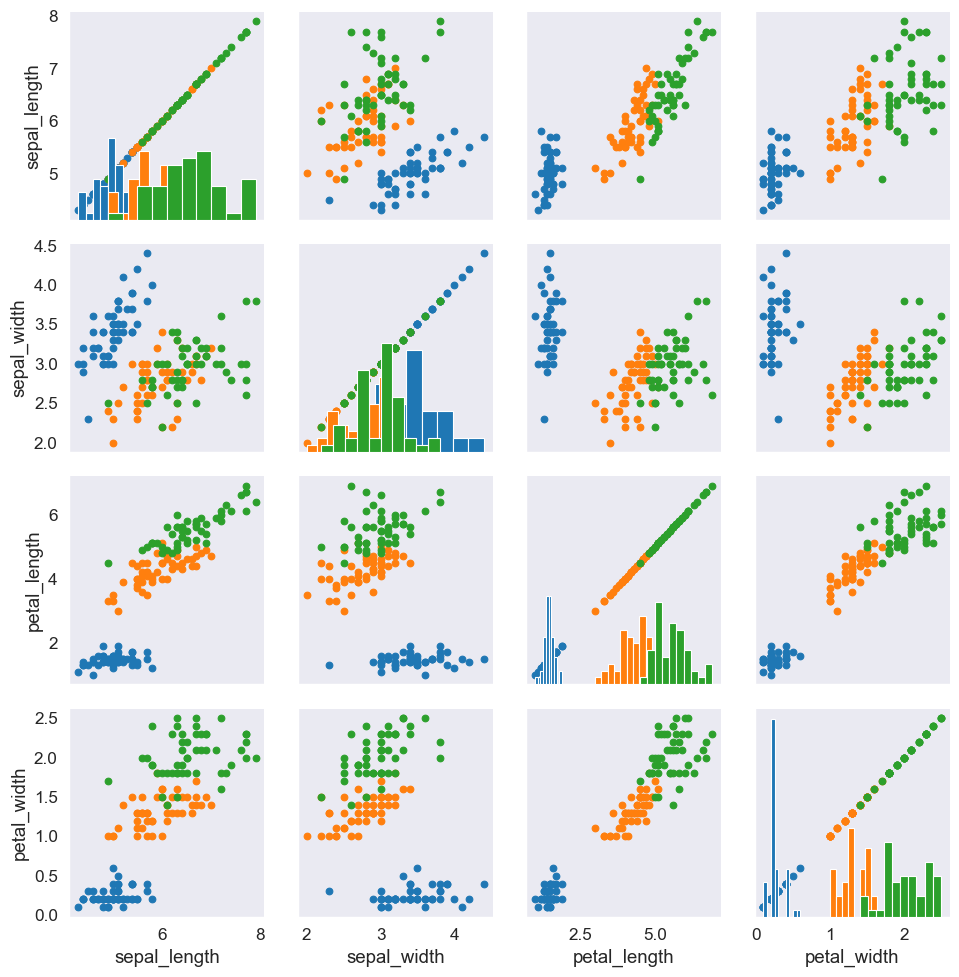

In [85]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
plt.show()

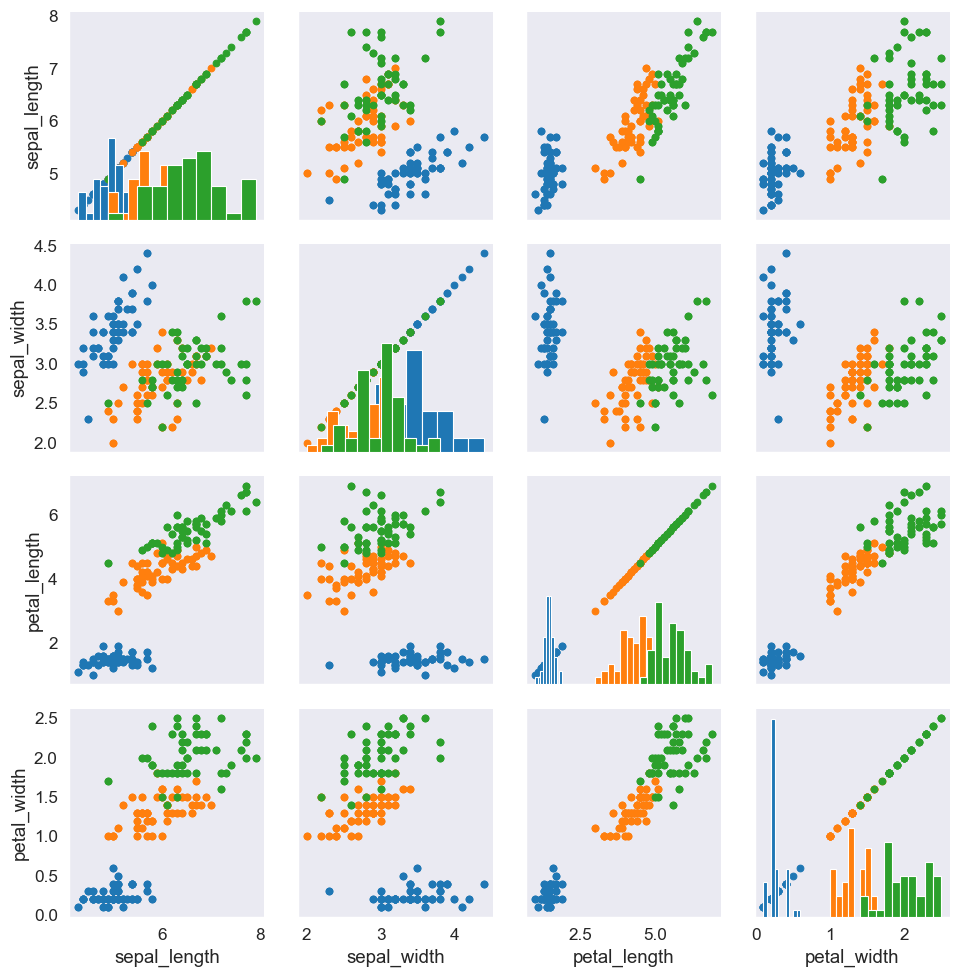

In [84]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)
plt.show()

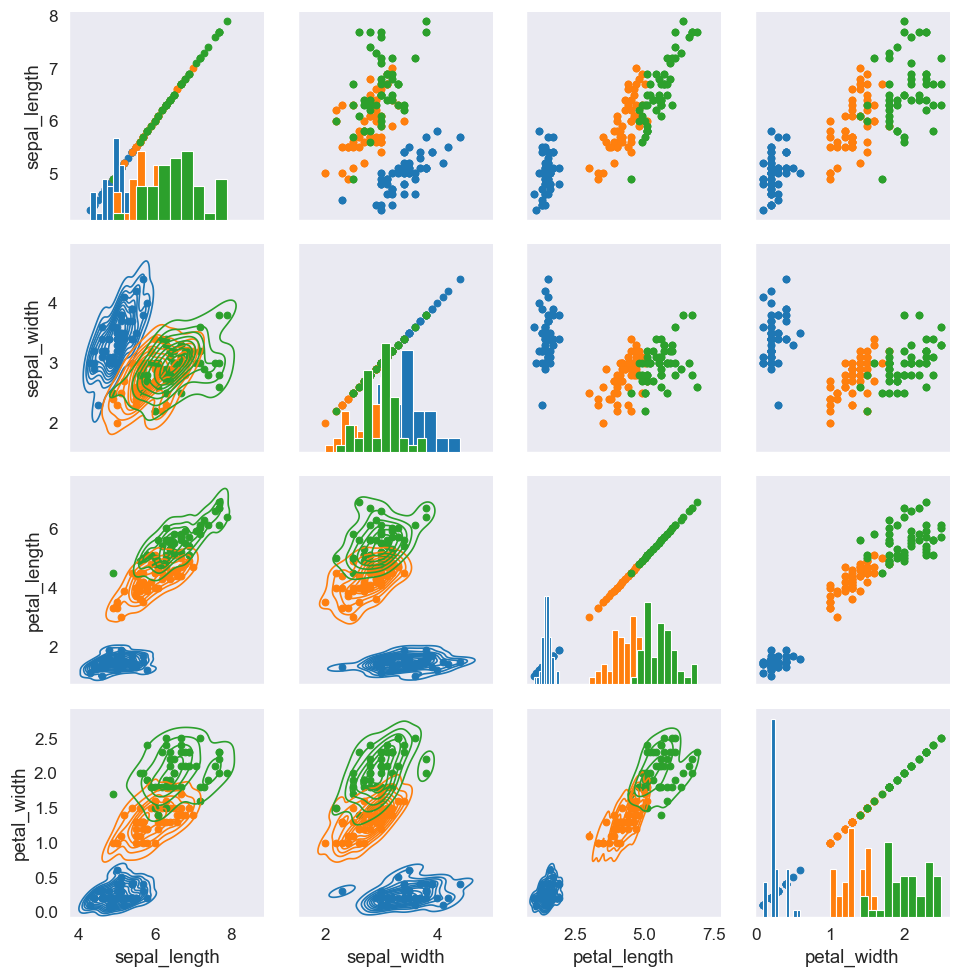

In [86]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue="species")
iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)

# Have different plots in upper, lower and diagonal
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

plt.show()

<Figure size 800x600 with 0 Axes>

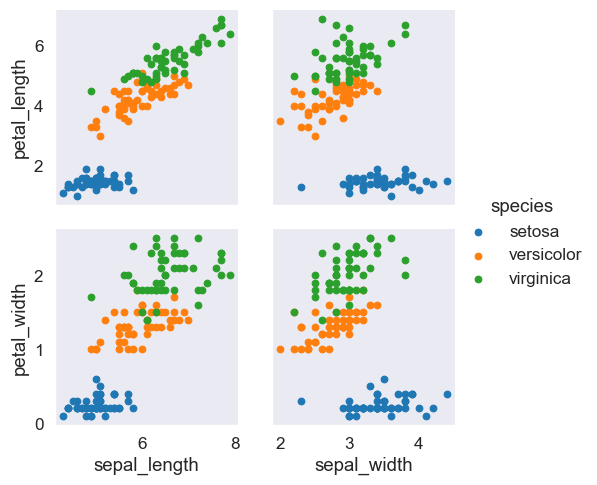

In [96]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()
plt.show()

# Facet Grid

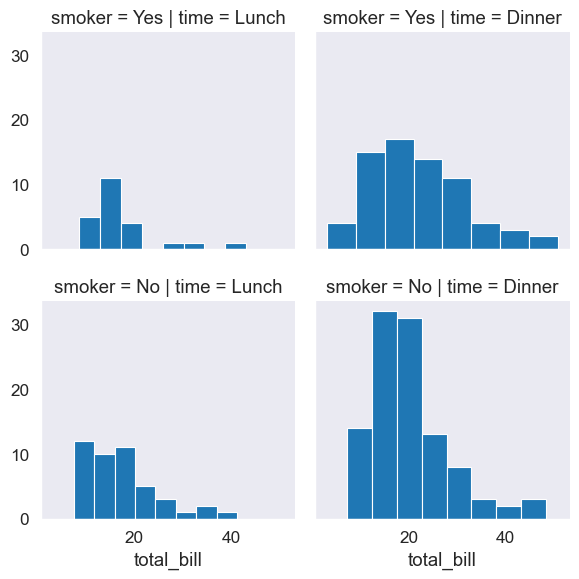

In [97]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
tips_fg.map(plt.hist, "total_bill", bins=8)

plt.show()

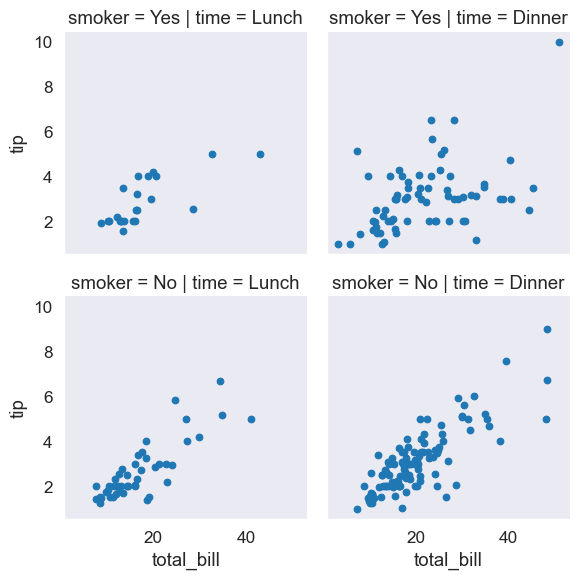

In [88]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# Create a scatter plot with data on total bill & tip (You need to parameters)
tips_fg.map(plt.scatter, "total_bill", "tip")

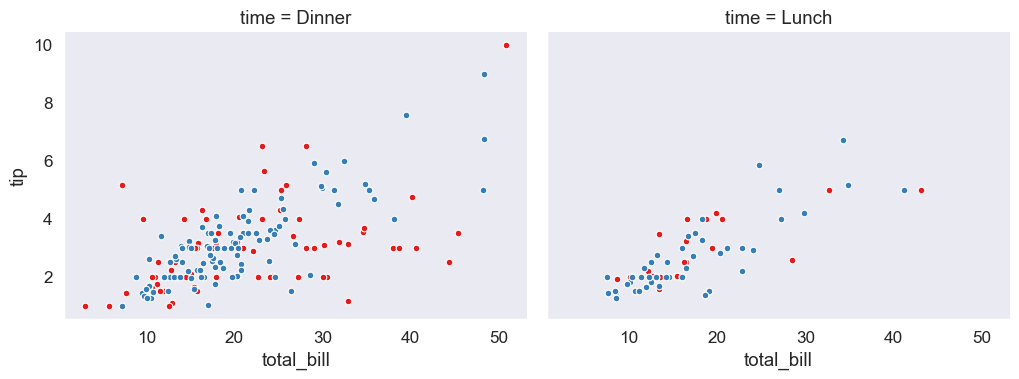

In [89]:
# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                      col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

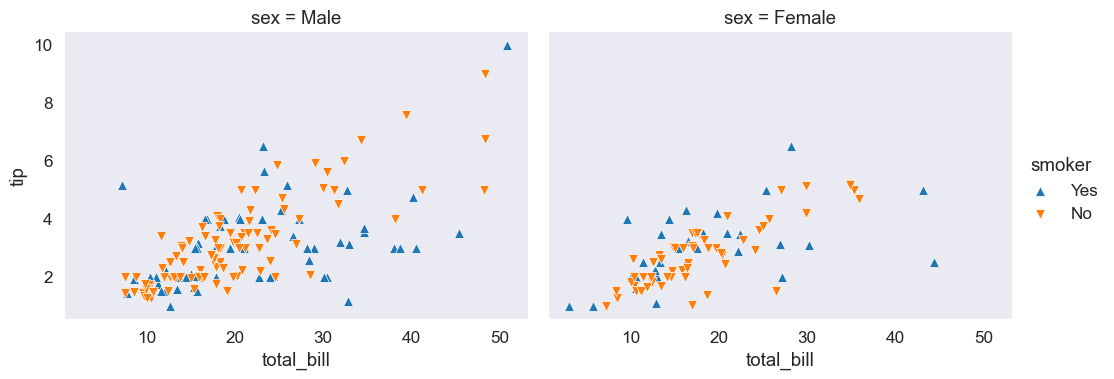

In [90]:
# # Define size, linewidth and assign a color of white to markers
kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                        hue_order=['Yes','No'], 
                        hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
tips_fg.add_legend()

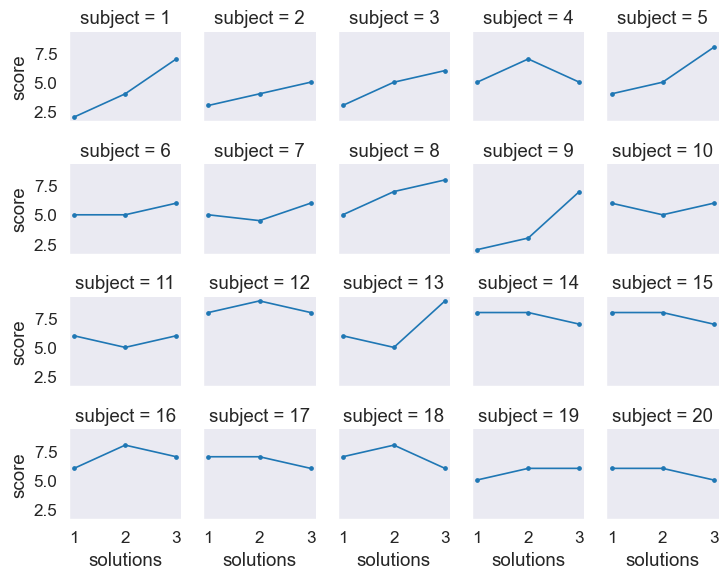

In [98]:
# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

# Regression Plot

In [30]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

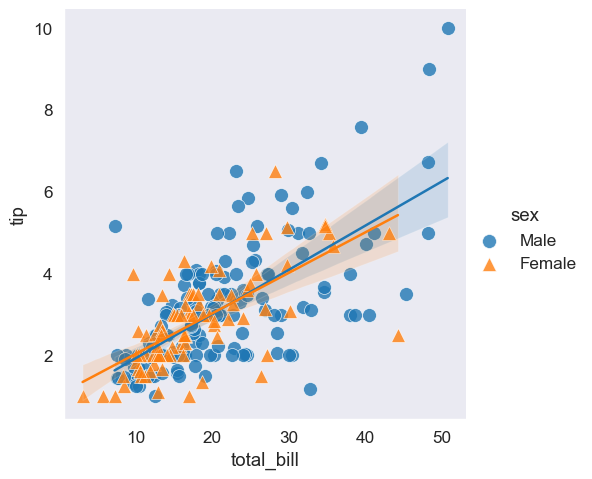

In [92]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers


# Regression & Scatter plot using lmplot
sns.lmplot(
    x='total_bill',
    y='tip',
    hue='sex',
    data=tips_df,
    markers=['o', '^'],
    scatter_kws={'s': 100, 'linewidths': 0.5, 'edgecolor': 'w'}
)

plt.show()

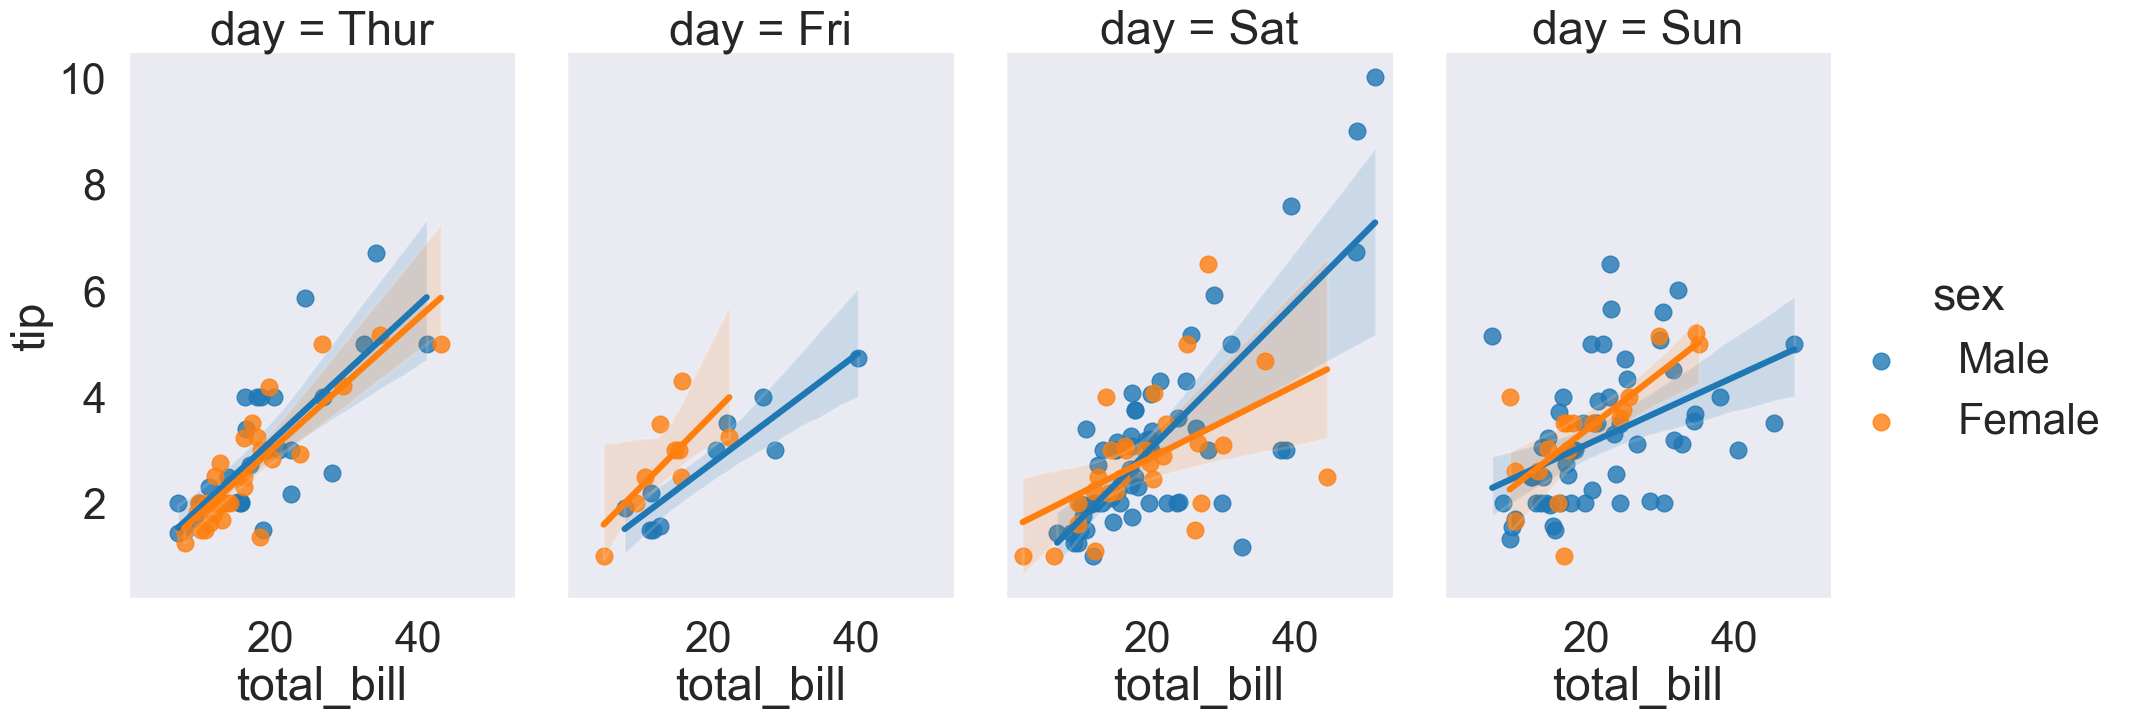

In [93]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)

plt.show()